# Group 10 - Homework 6 -[Regression Tree]
## Group Members:
1.Mahajabin Mostafa   
2.Navya Madhuri Bagireddy  
3.Akshay Manoj  
4.Vinaika Maruvada

## Aim

* The goal is to build a regression tree and use some or all of the explanatory variables to predict the median house value and inspect the evaluation measures.
* To modify the tree hyper-parameters (such as criterion, max depth, min samples split, and min samples leaf) of your model to increase the quality of the prediction and to use GridSearchCV(), RandomizedSearchCV() or pruning to find the best model.


## About the Dataset

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The columns are as follows:

1) MedInc: Median income for households within a block of houses (measured in tens of thousands of US Dollars) 
2) HouseAge: House age; a lower number is a newer building
3) AveRooms: Average number of rooms in houses within a block
4) AveBedrms: Average number of bedrooms in houses within a block
5) Population: Total number of people residing within a block
6) AveOccup: Average occupancy in houses within a block
7) Latitude: A measure of how far north a house is; a higher value is farther north
8) Longitude: A measure of how far west a house is; a higher value is farther west
9) MedHouseVal: Median house value for households within a block (measured in hundreds of thousands of US Dollars) - **Output Variable**

## Methodology

**Importing the necessary libraries and data set**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings

In [2]:
df=pd.read_csv('cali_housing.csv')
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,0.781
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,0.771
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,0.923
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,0.847


In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  int64  
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  int64  
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


There are 9 columns and 20640 rows in the dataset. Also, the above table gives us the statistical summary of the features.

## Exploratory Data Analysis

**Checking for null values**

In [6]:
df.isna().mean().to_frame(name='% of missing values')

,% of missing values
MedInc,0.0
HouseAge,0.0
AveRooms,0.0
AveBedrms,0.0
Population,0.0
AveOccup,0.0
Latitude,0.0
Longitude,0.0
MedHouseVal,0.0


Clearly, there are no missing values in the given data.

**Box Plot for all the features**

In [7]:

def columns_boxplot(df):
    l = len(df.columns)
    plt.figure(figsize=(20,30))
    for i in range(l):
        plt.subplot(l,1, i+1)
        sns.boxplot(x=df[df.columns[i]])
        plt.title(f'BoxPlot of {df.columns[i]}', fontsize=22, color ='darkblue')
        

    plt.tight_layout()  
    plt.show()

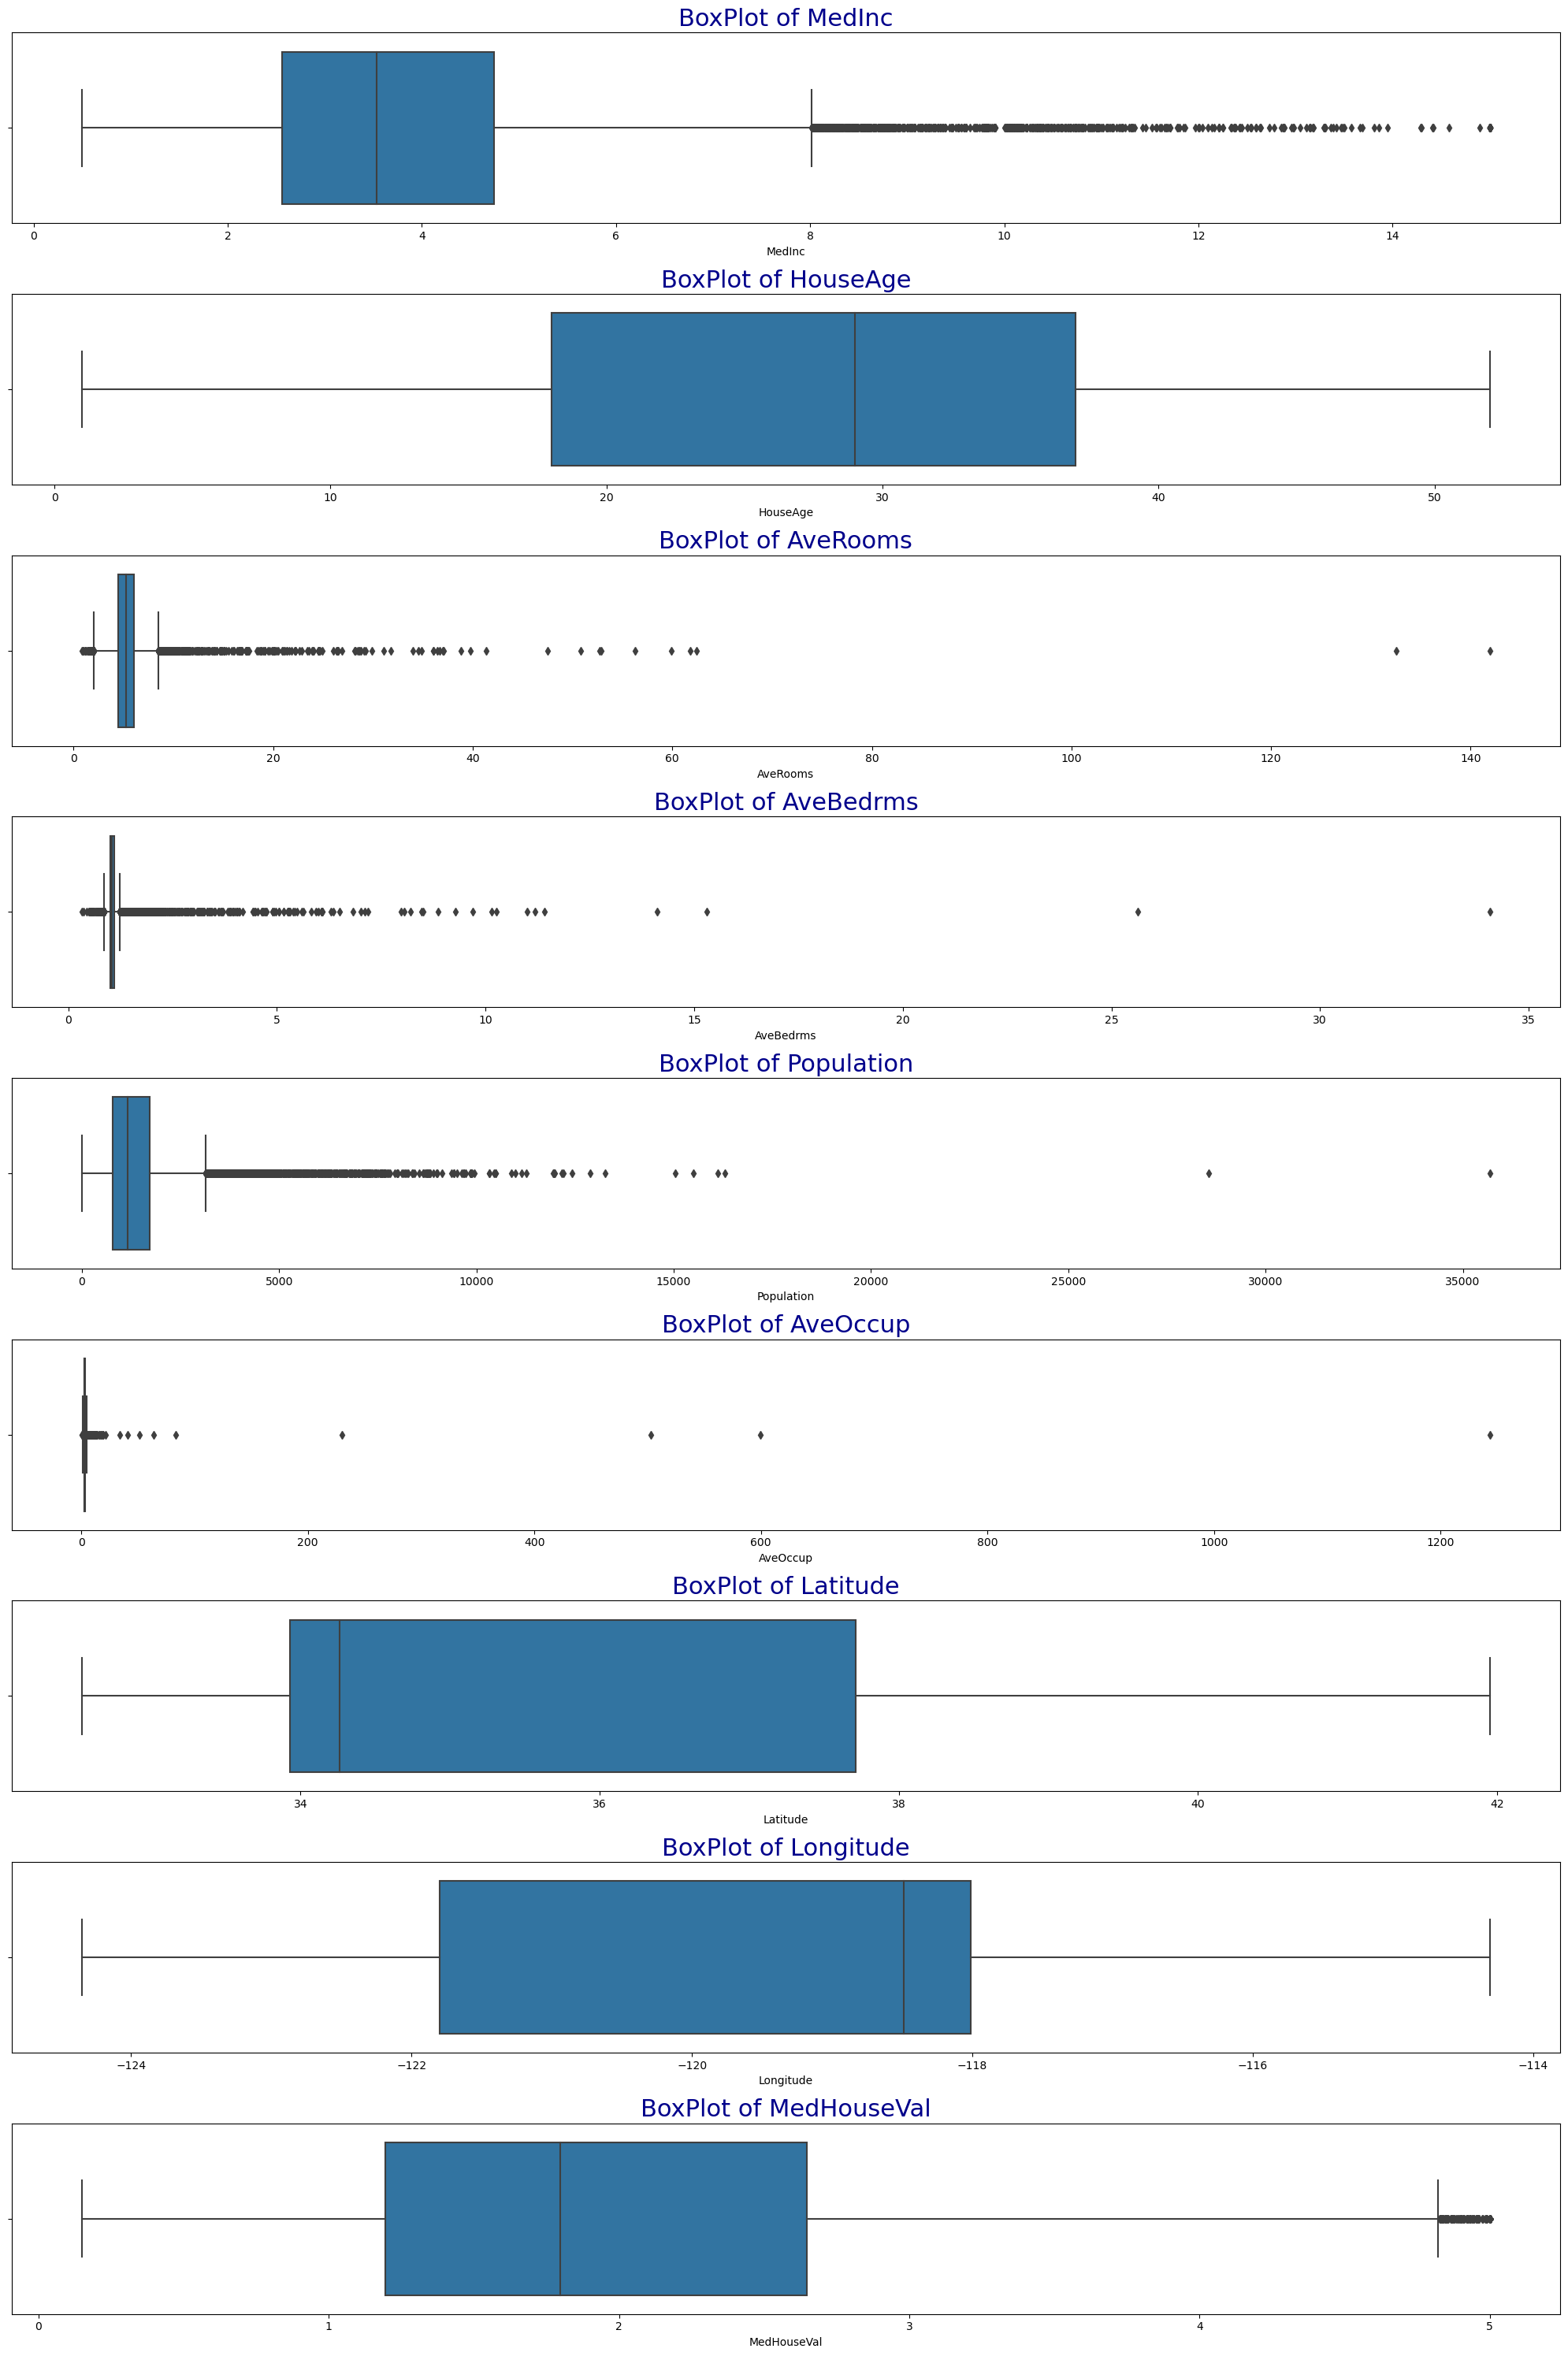

In [8]:
columns_boxplot(df)

There are outliers in :

* AveBedrms
* AveRooms
* Population
* AveOccup
* MedInc
* median_house_value

**Histogram for all the features**

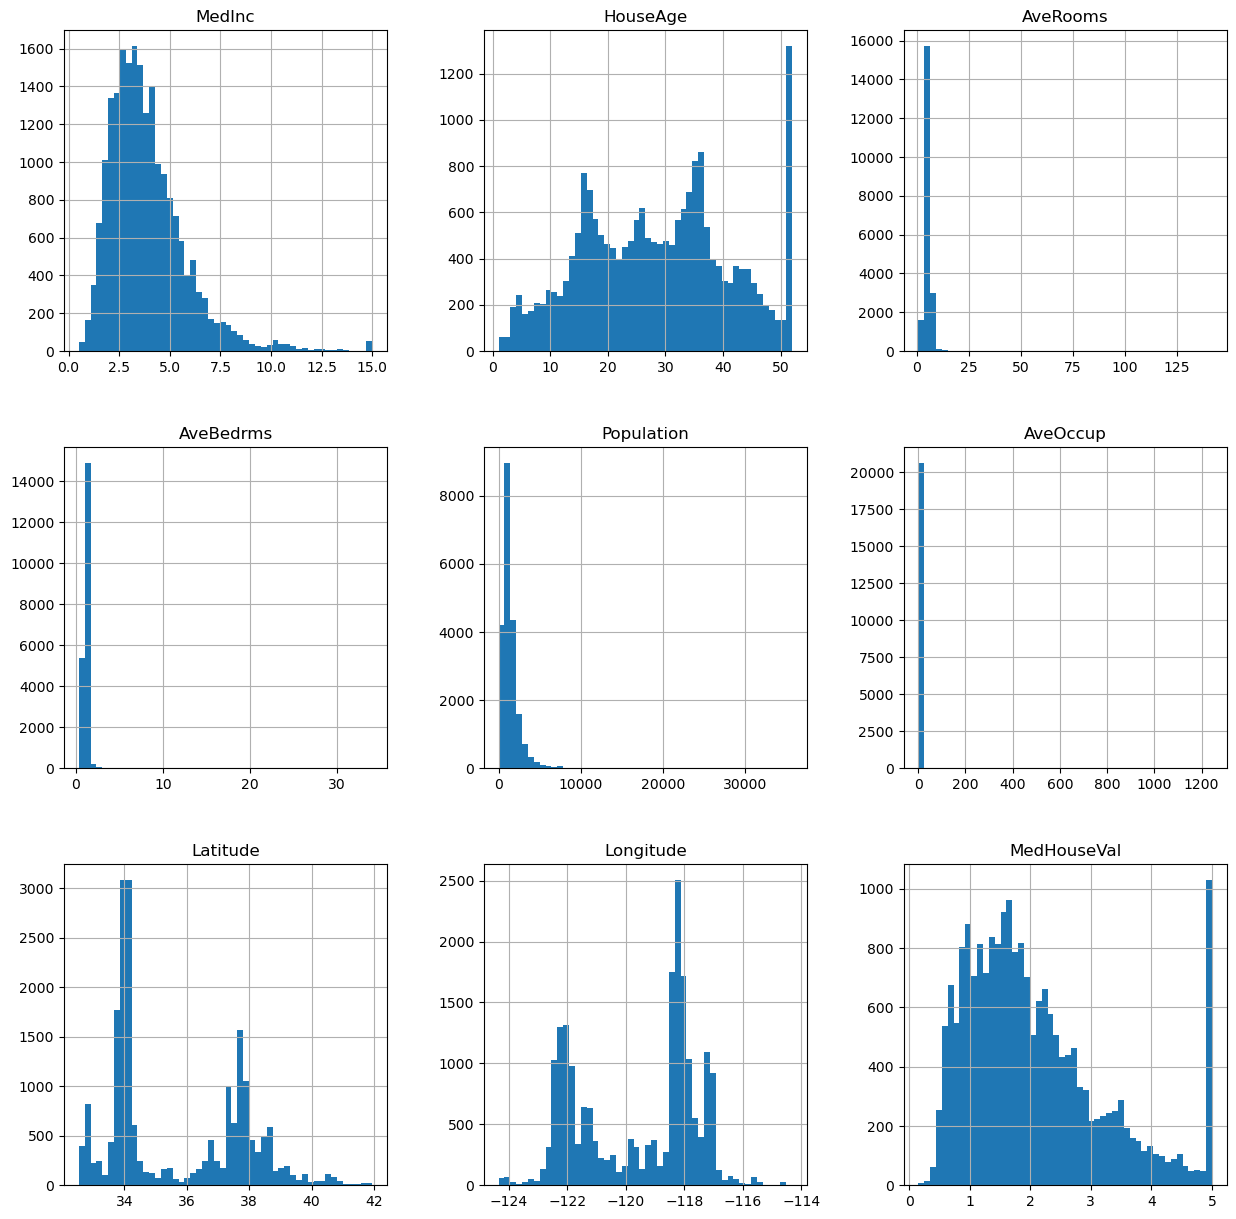

In [9]:
df.hist(bins=50,figsize=(15,15)) #hist() function is used to show the distribution of data
plt.show()

From the above histogram, we can see how different features in the data are distrbuted

**Pair plot for all the features**

C:\Users\Vinaika Maruvada\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


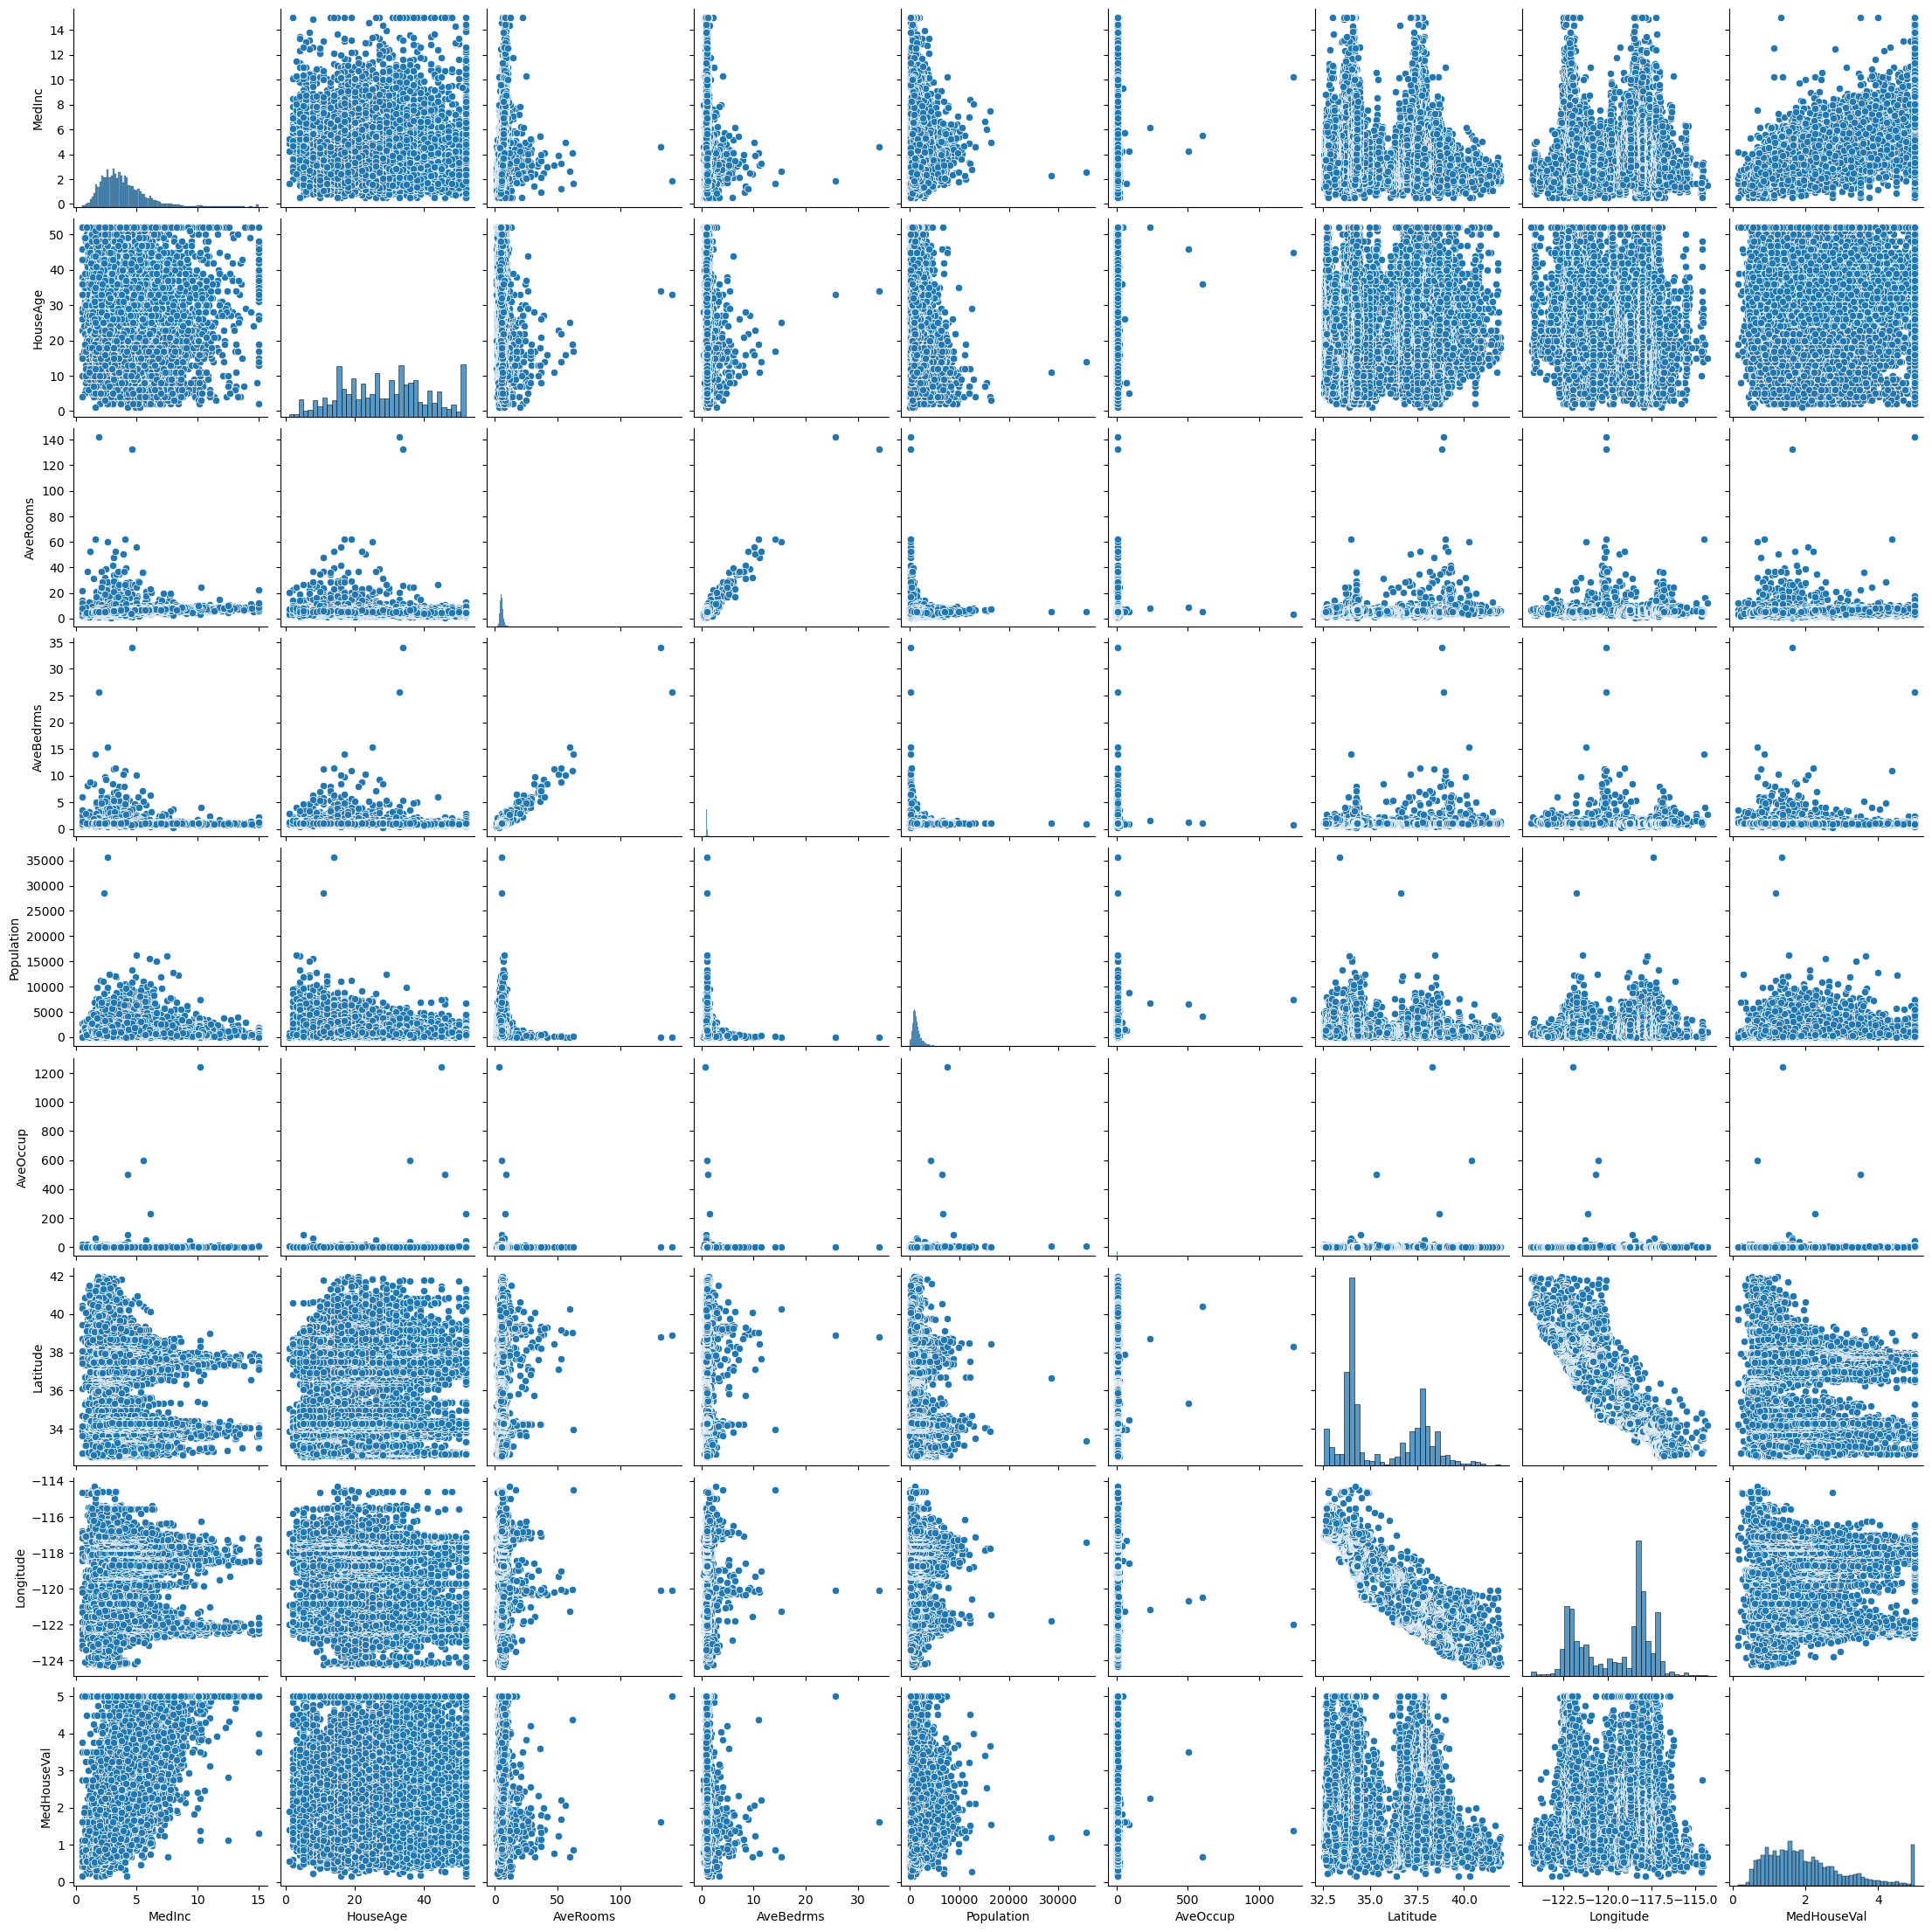

In [10]:
sns.pairplot(df)
plt.show()

**Heat Map for all the features**

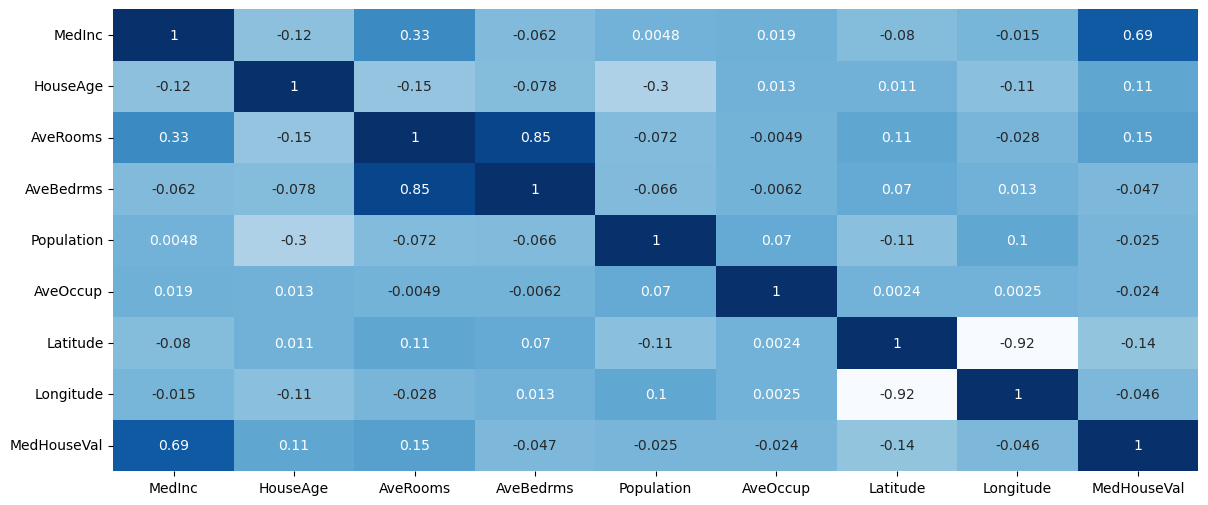

In [11]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(method='pearson'),
            annot=True,
            cbar=False,
            cmap='Blues')
plt.show()

* The median house values exhibit a moderate positive correlation with median income as shown by the heatmap using Pearson correlation coefficient.
* AveRooms is highly correlated with AveBedrms and population.
* Longitude has strong negative correlation with Latitude

Consequently, we choose these features and create subplots using scatter plots to visualize their relationships. Lets remove AveOccup while building the model as its has least correlation with MedHouseVal and from the pair plot, we see that AveOccup is not affected much by MedHouseVal.

**Detecting and removing outliers**

In [12]:
def columns_outlier(df):
    for col in df.columns:
        if col in (df.select_dtypes(include=['number'])):
            q1,q3 = df[col].quantile([0.25,0.75])
            iqr = q3 - q1
            lower = q1- 1.5*iqr
            upper = q3+ 1.5*iqr
            outlier = (df[col]<lower) | (df[col]>upper)
            df = df.drop(df[outlier].index, axis=0)
        elif col in (df.select_dtypes(include=['object'])):
            data[col].count()
            
            if len(df[col])<len(df.columns):
                df = df.drop(df[col], axis=0)
        df.reset_index(drop=True, inplace=True)
    return df
columns_outlier(df).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16232 entries, 0 to 16231
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       16232 non-null  float64
 1   HouseAge     16232 non-null  int64  
 2   AveRooms     16232 non-null  float64
 3   AveBedrms    16232 non-null  float64
 4   Population   16232 non-null  int64  
 5   AveOccup     16232 non-null  float64
 6   Latitude     16232 non-null  float64
 7   Longitude    16232 non-null  float64
 8   MedHouseVal  16232 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.1 MB


In [13]:
df = columns_outlier(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16232 entries, 0 to 16231
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       16232 non-null  float64
 1   HouseAge     16232 non-null  int64  
 2   AveRooms     16232 non-null  float64
 3   AveBedrms    16232 non-null  float64
 4   Population   16232 non-null  int64  
 5   AveOccup     16232 non-null  float64
 6   Latitude     16232 non-null  float64
 7   Longitude    16232 non-null  float64
 8   MedHouseVal  16232 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.1 MB


**Model Building**

In [14]:
X=df.drop(['MedHouseVal','AveOccup'],axis=1) #independent variables
y=df['MedHouseVal'] #dependent variable

Scaling and encoding are not required in decision trees because decision trees split data based on relative feature ordering, can handle categorical variables directly.

**Splitting the data into train and test sets**

In [15]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

**Building regression tree with out any hyperparamaters**

In [16]:
# decision tree with default hyperparametrs
regressor = tree.DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [17]:
#depth of the tree
regressor.get_depth()

36

In [18]:
#no.of leaves
regressor.get_n_leaves()

11273

In [19]:
y_pred_train=regressor.predict(X_train)
y_pred_test=regressor.predict(X_test)

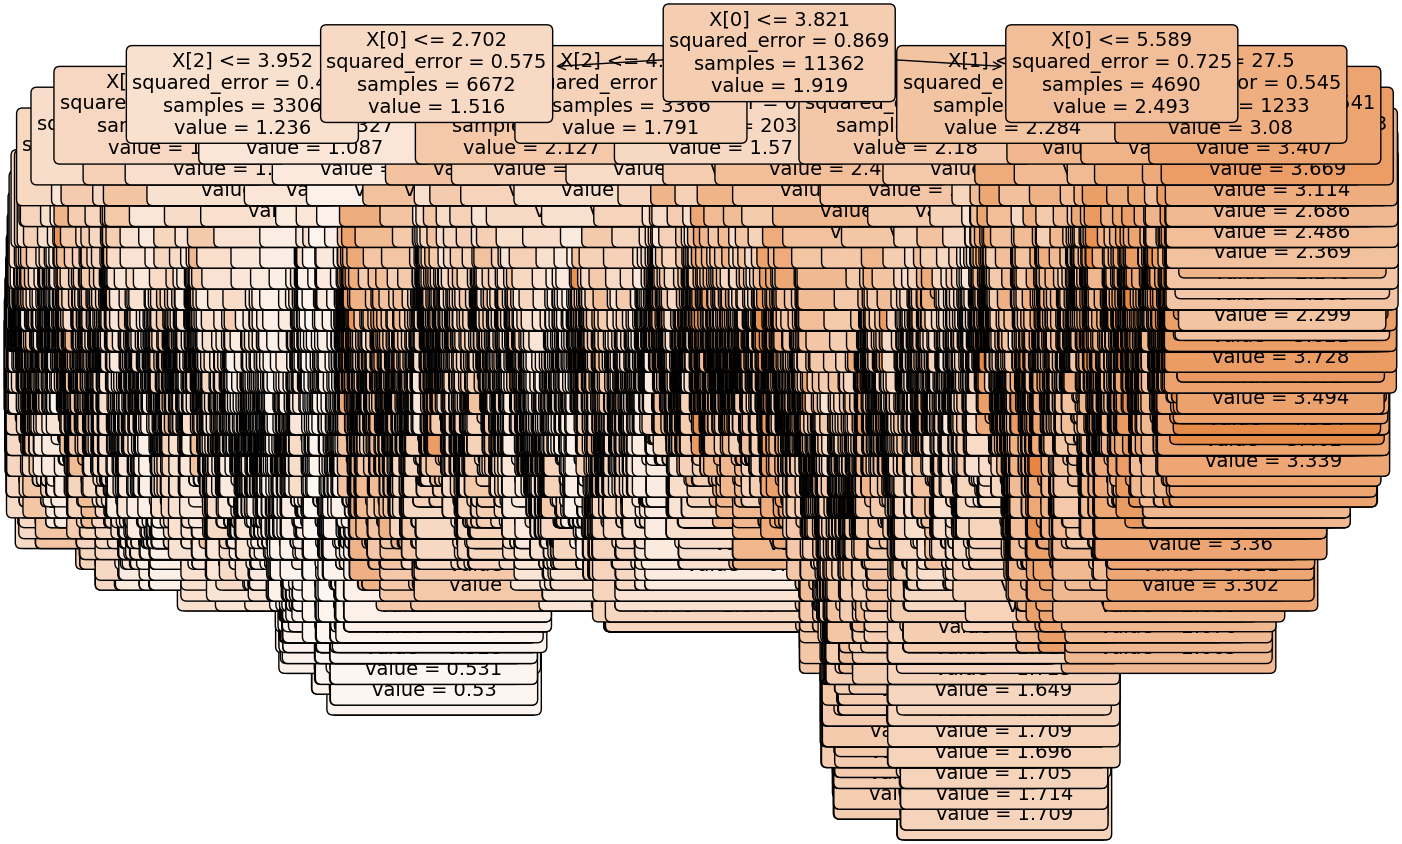

In [20]:
#printing the decision tree

plt.figure(figsize=(15,10))

tree.plot_tree(regressor,
               filled=True, 
               rounded=True,
               fontsize=14);

### Evaluating tree based on MSE,MAE

In [21]:
mae=mean_absolute_error(y_train, y_pred_train)
mse=mean_squared_error(y_train, y_pred_train)
print(f"The Mean Abs Error on Train data is {mae}")
print(f"The Mean Sq Error on Train data is {mse}")

The Mean Abs Error on Train data is 0.0
The Mean Sq Error on Train data is 0.0


In [22]:
mae=mean_absolute_error(y_test, y_pred_test)
mse=mean_squared_error(y_test, y_pred_test)
print(f"The Mean Abs Error on test data is {mae}")
print(f"The Mean Sq Error on Test data is {mse}")

The Mean Abs Error on test data is 0.43009302053388093
The Mean Sq Error on Test data is 0.41471614388503075


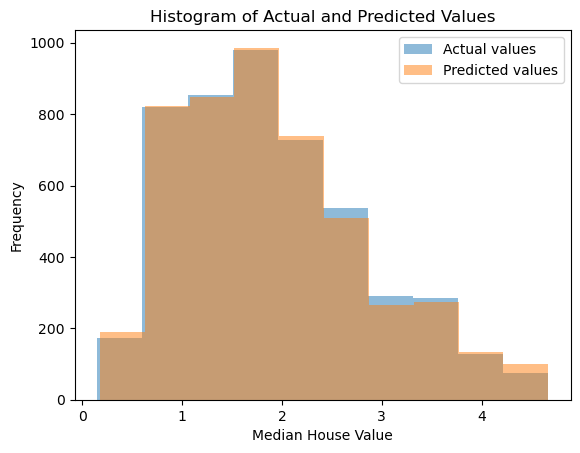

In [23]:
plt.hist(y_test, alpha=0.5, label="Actual values")
plt.hist(y_pred_test, alpha=0.5, label="Predicted values")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Histogram of Actual and Predicted Values")
plt.legend()
plt.show()

When a decision tree is built with no hyper parameters, a tree learns the entire training data which results in 0 training error. This leads to overfitting.

### Modifying Hyperparamters such as criterion,max_depth,min_Samples_split, and min_samples_leaf

**1. Implementing min_sample_split**

In [24]:


splitter_param=['best','random']
mse_test=[[],[]]
mse_train=[[],[]]
for i in range(len(splitter_param)):
    for j in range(2,50,2):
        tree=DecisionTreeRegressor(splitter=splitter_param[i], min_samples_split=j)
        tree.fit(X_train,y_train)
        mse_test[i].append(mean_squared_error(y_test,tree.predict(X_test)))
        mse_train[i].append(mean_squared_error(y_train,tree.predict(X_train)))

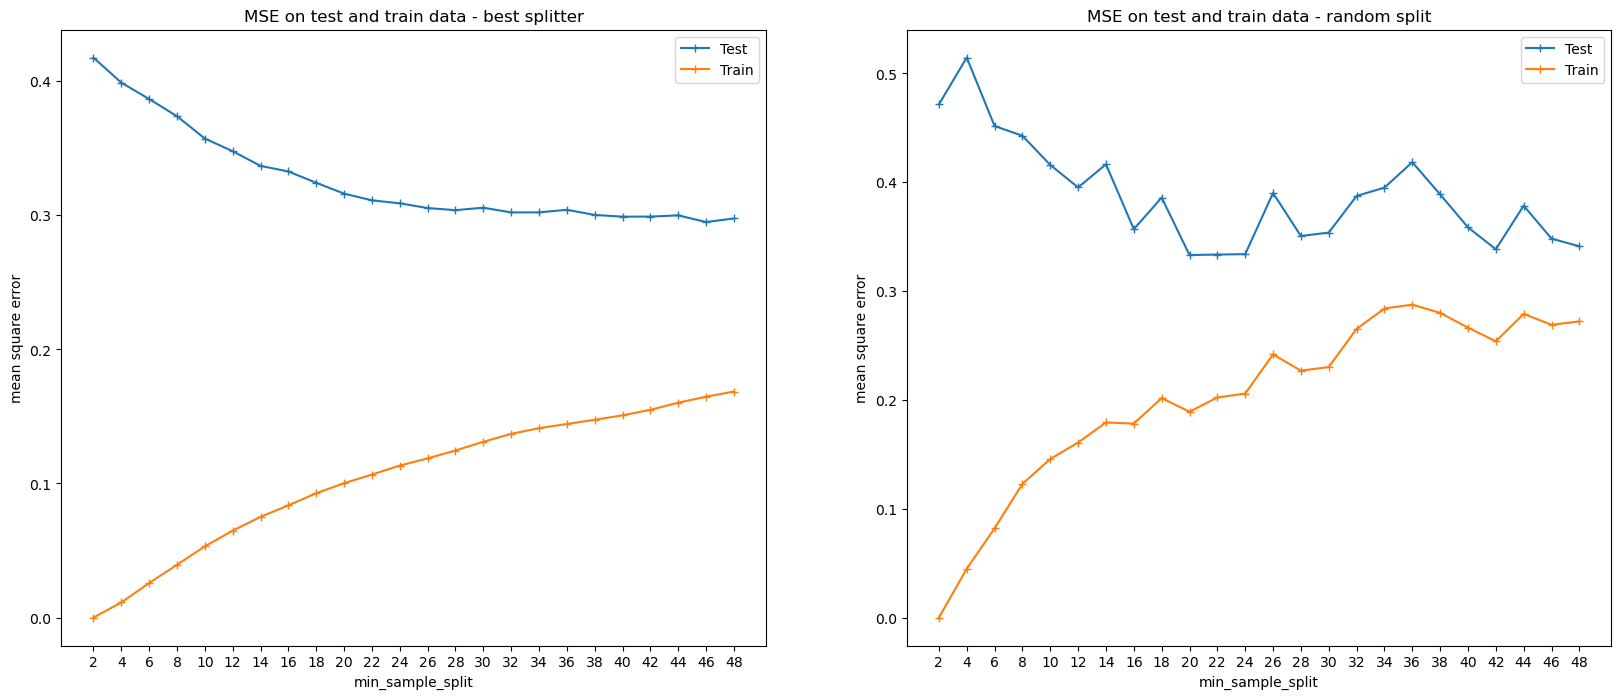

In [25]:
fig, axis = plt.subplots(1, 2, figsize=(20,8))
axis[0].plot(range(2,50,2), mse_test[0], marker = "+",label='Test')
axis[0].plot(range(2,50,2),mse_train[0],marker='+',label='Train')
axis[0].set_title("MSE on test and train data - best splitter")
axis[0].set_xlabel("min_sample_split")
axis[0].set_ylabel("mean square error")
axis[0].legend()
axis[0].set_xticks(range(2,50,2))



axis[1].plot(range(2,50,2), mse_test[1], marker = "+", label='Test')
axis[1].plot(range(2,50,2),mse_train[1],marker='+',label='Train')
axis[1].set_title("MSE on test and train data - random split")
axis[1].set_xlabel("min_sample_split")
axis[1].set_ylabel("mean square error")
axis[1].set_xticks(range(2,50,2))
axis[1].legend()

plt.show()

We can see that at min_sample_split = 20 in random split, there is drop in both training and testing MSE.

**2. Implementing max_Depth**

In [26]:


splitter_param=['best','random']
mse_test=[[],[]]
mse_train=[[],[]]
for i in range(len(splitter_param)):
    for j in range(1,30):
        tree=DecisionTreeRegressor(splitter=splitter_param[i], max_depth=j)
        tree.fit(X_train,y_train)
        mse_test[i].append(mean_squared_error(y_test,tree.predict(X_test)))
        mse_train[i].append(mean_squared_error(y_train,tree.predict(X_train)))

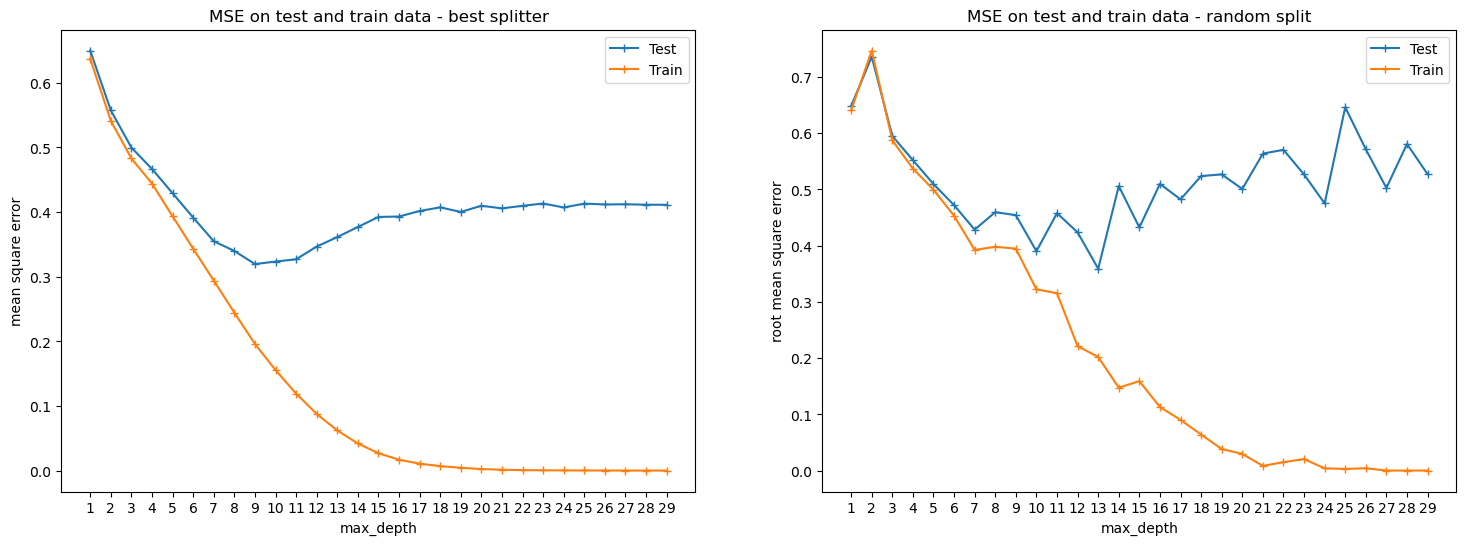

In [27]:
fig, axis = plt.subplots(1, 2, figsize=(18,6))

axis[0].plot(range(1,30), mse_test[0], marker = "+",label='Test')
axis[0].plot(range(1,30),mse_train[0],marker='+',label='Train')
axis[0].set_title("MSE on test and train data - best splitter")
axis[0].set_xlabel("max_depth")
axis[0].set_ylabel("mean square error")
axis[0].set_xticks(range(1,30))
axis[0].legend()


axis[1].plot(range(1,30), mse_test[1], marker = "+",label='Test')
axis[1].plot(range(1,30),mse_train[1],marker='+',label='Train')
axis[1].set_title("MSE on test and train data - random split")
axis[1].set_xlabel("max_depth")
axis[1].set_ylabel("root mean square error")
axis[1].set_xticks(range(1,30))
axis[1].legend()

plt.show()

We can see that at max_depth = 10 in random split, there is drop in both training and testing MSE without overfitting.

**3. Implementing min_samples_leaf**

In [28]:
splitter_param=['best','random']
mse_test=[[],[]]
mse_train=[[],[]]
for i in range(len(splitter_param)):
    for j in range(1,30):
        tree=DecisionTreeRegressor(splitter=splitter_param[i], min_samples_leaf=j)
        tree.fit(X_train,y_train)
        mse_test[i].append(mean_squared_error(y_test,tree.predict(X_test)))
        mse_train[i].append(mean_squared_error(y_train,tree.predict(X_train)))

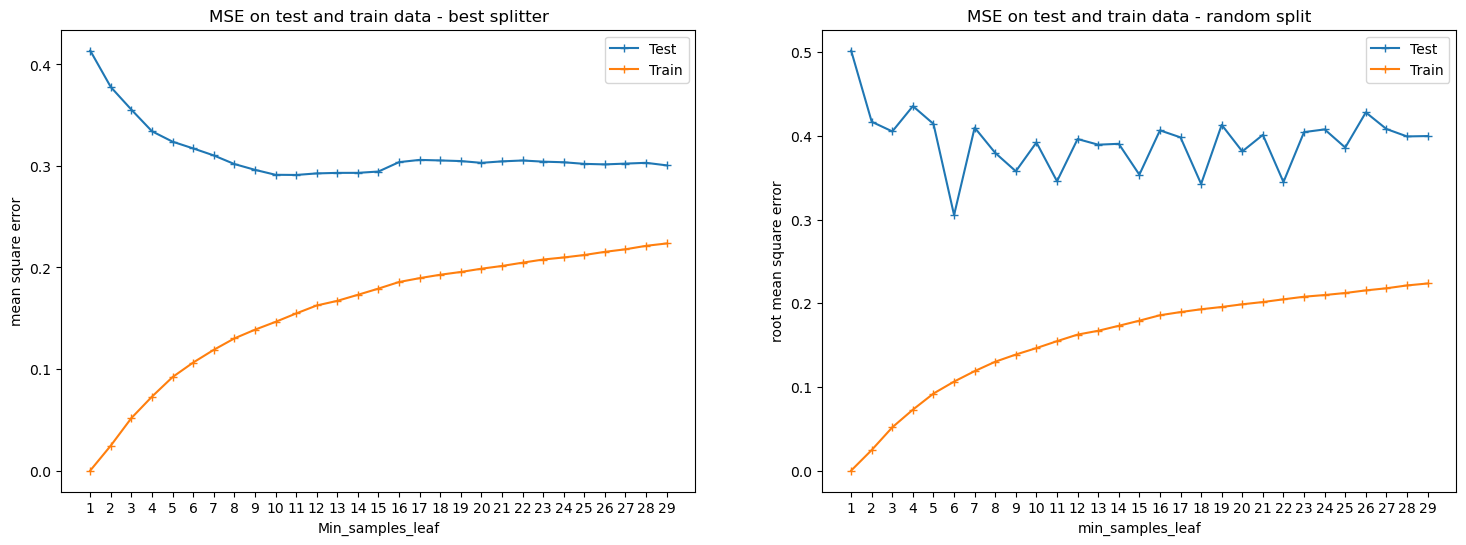

In [29]:
fig, axis = plt.subplots(1, 2, figsize=(18,6))

axis[0].plot(range(1,30), mse_test[0], marker = "+",label="Test")
axis[0].plot(range(1,30),mse_train[0],marker='+',label='Train')
axis[0].set_title("MSE on test and train data - best splitter")
axis[0].set_xlabel("Min_samples_leaf")
axis[0].set_ylabel("mean square error")
axis[0].set_xticks(range(1,30))
axis[0].legend()


axis[1].plot(range(1,30), mse_test[1], marker = "+",label="Test")
axis[1].plot(range(1,30),mse_train[0],marker='+',label='Train')
axis[1].set_title("MSE on test and train data - random split")
axis[1].set_xlabel("min_samples_leaf")
axis[1].set_ylabel("root mean square error")
axis[1].set_xticks(range(1,30))
axis[1].legend()

plt.show()

We can clearly see overfittting in the model for every value of min_samples_leaf considered.

Here, as asked we divided the data into training and testing to build a decision tree model and to test the hyper parameters. But, in reality we are supposed to have a validation set to tune the hyper parameteres inorder to avoid data leakage.

Hence, we will now use RandomizedSearchCV to find the best hyperparatemerts to build a Decision Tree Regressor.

### Using  RandomizedSearchCV to find best parameters

In [30]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'splitter':['best','random'],
              'max_depth': [1,3,5,7,9,11,13,15],
              'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,11,12],
              'min_samples_split': [1,3,5,7,9,11,13,15,17,19,21],
              'max_leaf_nodes':[10,20,30,40,50,60,70]
             }

In [31]:
random_search = RandomizedSearchCV(regressor, param_grid, cv=5) 
random_search.fit(X_train,y_train)

C:\Users\Vinaika Maruvada\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vinaika Maruvada\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vinaika Maruvada\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1342, in fit
    super().fit(
  File "C:\Users\Vinaika Maruvada\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    check_scalar(
  File "C:\Users\Vinaika Maruvada\anaconda

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 13,
                                                      15],
                                        'max_leaf_nodes': [10, 20, 30, 40, 50,
                                                           60, 70],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12],
                                        'min_samples_split': [1, 3, 5, 7, 9, 11,
                                                              13, 15, 17, 19,
                                                              21],
                                        'splitter': ['best', 'random']})

In [32]:
random_search.best_params_

{'splitter': 'random',
 'min_samples_split': 17,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 70,
 'max_depth': 11}

Based on RandomizedSearchCv the best hyperparameters for our model are:

* splitter: random
* min_samples_split: 17
* min_samples_leaf: 5
* max_leaf_nodes: 70
* max_depth: 11

In [33]:
# gives the score of the best set of hyperparameters
random_search.best_score_

0.5191333714149835

In [34]:
y_test_pred=random_search.predict(X_test)

In [35]:
mae=mean_absolute_error(y_test_pred,y_test)
mse=mean_squared_error(y_test_pred,y_test)
print(f"The Mean Abs Error on test data is {mae}")
print(f"The Mean Sq Error on Test data is {mse}")

The Mean Abs Error on test data is 0.4827144023461375
The Mean Sq Error on Test data is 0.41690126401191185


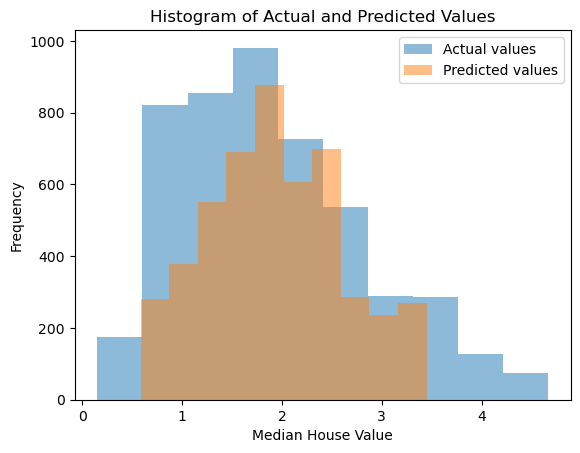

In [36]:
plt.hist(y_test, alpha=0.5, label="Actual values")
plt.hist(y_test_pred, alpha=0.5, label="Predicted values")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Histogram of Actual and Predicted Values")
plt.legend()
plt.show()

* The Mean Absolute Error on test data is 0.48
* The Mean Square Error on test data is 0.41

**Feature importances**

In [37]:
feature_importance=regressor.feature_importances_
feature_importance

array([0.43625186, 0.06139409, 0.09162125, 0.03223108, 0.03448771,
       0.16391879, 0.18009522])

**Bar graph to show importance of each feature**

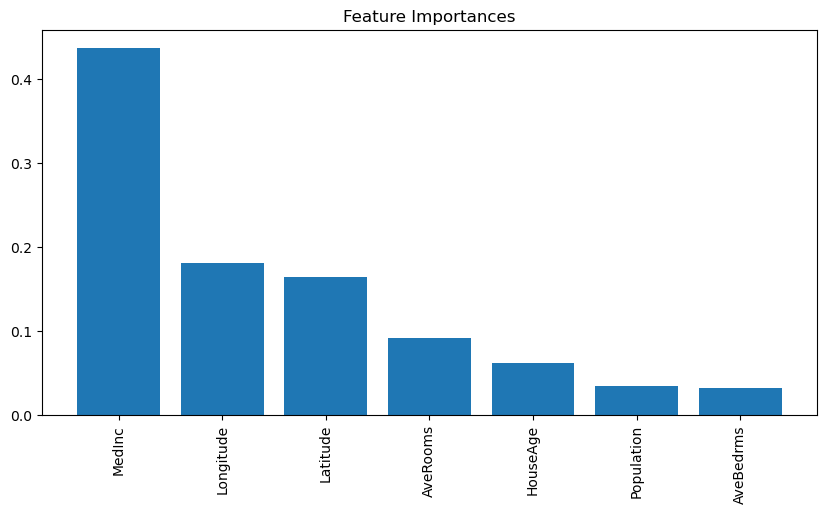

In [38]:
features = X.columns
indices = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importance[indices])
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()

 Median income for households within a block of houses has more weightage in predicting the median house value.

**Predicting median house value for a random samples**

In [39]:
data = pd.DataFrame({
    'MedInc': [9, 1.5, 7.4],
    'HouseAge': [4, 14, 50],
    'AveRooms': [3.6, 5.4, 8.7],
    'AveBedrms': [1, 2, 3],
    'Population': [100, 240, 2345],
    'Latitude': [37.33, 34.38, 36.39],
    'Longitude': [-121, -122, -123]
})

In [40]:
median_house_value_pred= regressor.predict(data)
print(median_house_value_pred)

[2.125 1.875 4.268]


## Conclusion

In conclusion, the decision tree analysis performed on the Cali_housing dataset has yielded actionable insights into the factors driving housing prices in California. Through feature importance analysis, we identified median income , longitude and lattitude as the most influential factors affecting property values. This underscores the importance of socioeconomic status and geographic positioning in the state's real estate market.

The decision tree model achieved a commendable level of accuracy in predicting housing prices, with a mean square error of 0.41. This indicates the model's reliability in estimating property values based on key features.

Moving forward, model refinement through hyperparameter tuning and ensemble methods could further enhance predictive performance. Additionally, exploring the temporal dynamics of housing trends and incorporating external datasets could provide a more comprehensive understanding of market fluctuations.

In practical terms, these findings can inform real estate stakeholders, policymakers, and investors in making informed decisions regarding property valuation, investment strategies, and urban planning initiatives. Overall, the project highlights the effectiveness of decision tree analysis in extracting valuable insights from complex datasets to support data-driven decision-making processes in the housing sector.